# 4.7.6 텐서플로 케라스 신경망 모델

# 이 절은 구글 코랩에서 실행해야 함에 유의

In [ ]:
# house-standard.csv 파일을 구글 드라이브에 업로딩하고 이를 구글 코랩에서 불러오기 위해서는 
# 책 본문의 안내 사항 준수 필요

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/Data/house-standard.csv')
df.head(3)

,AGEP,BDSP,ELEP,GASP,HINCP,NRC,RMSP,BATH,FESRP,FKITP,FSCHP,FTAXP,R18,RWAT,VALP_B1,ACCESS_1.0,ACCESS_2.0,ACR_1.0,ACR_2.0,BLD_2.0,COW_0,COW_1,COW_2,COW_3,COW_4,COW_5,COW_6,COW_7,COW_8,FPARC_0,FPARC_1,FPARC_2,FPARC_3,HHL_1.0,HHL_2.0,HHL_3.0,HHL_4.0,HHT_1.0,HHT_2.0,HHT_3.0,...,MV_5.0,MV_6.0,R65_1.0,R65_2.0,RAC1P_1,RAC1P_2,RAC1P_3,RAC1P_4,RAC1P_5,RAC1P_6,RAC1P_7,RAC1P_9,SCH_0,SCH_2,SCH_3,SCHL_0,SCHL_2,SCHL_3,SCHL_4,SCHL_5,SCHL_6,SCHL_7,SCHL_8,SCHL_9,SCHL_10,SCHL_11,SCHL_12,SCHL_13,SCHL_14,SCHL_15,SCHL_16,SCHL_17,SCHL_18,SCHL_19,SCHL_20,SCHL_21,SCHL_22,SCHL_23,SCHL_24,SEX_2
0,1.277527,-0.185587,-0.218278,-0.030785,-0.857357,-0.757285,-0.779457,1.0,0,0.0,0,0.0,0.0,1.0,1.0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,0.115555,-0.185587,1.548888,-1.029228,0.537778,-0.757285,-0.261327,1.0,0,0.0,0,0.0,0.0,1.0,1.0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,0.074056,-0.185587,1.548888,-1.029228,0.537778,-0.757285,-0.261327,1.0,0,0.0,0,0.0,0.0,1.0,1.0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(20495, 93)

In [ ]:
df.to_csv('/content/drive/MyDrive/Data/t.csv')

In [ ]:
df.to_csv('t.csv')

In [ ]:
df.isna().any()[lambda x: x]   # 결측값을 갖고 있는 변수명(컬럼명) 찾기

Series([], dtype: bool)

In [ ]:
data = df.drop(['VALP_B1'], axis=1)   # 타겟변수를 제외한 입력변수를 data에 저장
target = df['VALP_B1']                # 타겟변수만 target에 저장

# 50:50 데이터 분할
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( 
    data, target, test_size=0.5, random_state=42)   # test_size=0.5임에 주의 

print("X_train shape:", X_train.shape) 
print("X_test shape:", X_test.shape) 

X_train shape: (10247, 92)
X_test shape: (10248, 92)


In [ ]:
type(X_train)

pandas.core.frame.DataFrame

In [ ]:
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()

y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

In [ ]:
print(X_train_np) 

[[ 0.53054523  1.13282311 -0.09205177 ...  0.          0.
   0.        ]
 [ 0.94553516 -0.18558743 -0.84940858 ...  0.          0.
   0.        ]
 [-1.08791547  1.13282311  2.43247093 ...  0.          0.
   0.        ]
 ...
 [ 0.44754725 -2.82240852 -0.84940858 ...  0.          0.
   0.        ]
 [ 0.73804019 -0.18558743 -1.35431312 ...  0.          0.
   1.        ]
 [ 0.90403616 -1.50399798 -1.22808699 ...  0.          0.
   1.        ]]


In [ ]:
X_train_np.shape

(10247, 92)

In [ ]:
print(y_train_np)

[1. 0. 1. ... 0. 1. 0.]


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
# 활성화 함수 relu, 옵티마이저 adam

In [ ]:
# 참조 코딩. 필요시 사용 가능
import random as python_random

np.random.seed(123)
python_random.seed(123)
tf.random.set_seed(1234)

In [ ]:
# 활성화 함수 relu
model = tf.keras.Sequential([
  layers.Dense(100, activation='relu', input_shape=[92]),
  layers.Dropout(.5),
  layers.Dense(100, activation='relu'),
  layers.Dropout(.5),
  layers.Dense(1, activation = 'sigmoid')
])

In [ ]:
# 옵티마이저 adam
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
# 다음 코딩에 약 30초 소요
# 텐서플로 케라스 신경망 모델은 매번 실행시 모델 결과가 조금씩 다를 수 있음에 유의

In [ ]:
from tensorflow import keras
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint('Ch8-NN1.tf', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, monitor='val_accuracy',
                                                  restore_best_weights=True)

history = model.fit(X_train_np, y_train_np,
                    validation_split=0.25,
                    shuffle=True,
                    epochs=30,
                    callbacks = [checkpointer, early_stopping_cb]
                    )

Epoch 1/30
241/241 [==============================] - 2s 7ms/step - loss: 0.6090 - accuracy: 0.6606 - val_loss: 0.5571 - val_accuracy: 0.7119
Epoch 2/30
241/241 [==============================] - 1s 6ms/step - loss: 0.5645 - accuracy: 0.7131 - val_loss: 0.5486 - val_accuracy: 0.7229
Epoch 3/30
241/241 [==============================] - 1s 5ms/step - loss: 0.5451 - accuracy: 0.7227 - val_loss: 0.5376 - val_accuracy: 0.7319
Epoch 4/30
241/241 [==============================] - 1s 5ms/step - loss: 0.5352 - accuracy: 0.7372 - val_loss: 0.5347 - val_accuracy: 0.7315
Epoch 5/30
241/241 [==============================] - 1s 5ms/step - loss: 0.5265 - accuracy: 0.7394 - val_loss: 0.5324 - val_accuracy: 0.7377
Epoch 6/30
241/241 [==============================] - 1s 5ms/step - loss: 0.5179 - accuracy: 0.7424 - val_loss: 0.5261 - val_accuracy: 0.7416
Epoch 7/30
241/241 [==============================] - 1s 5ms/step - loss: 0.5123 - accuracy: 0.7498 - val_loss: 0.5209 - val_accuracy: 0.7385
Epoch 

In [ ]:
# X_train 행수 10247의 0.75가 training에 0.25는 validation에 쓰였음
# 10247*0.75 = 7685.25 이제 위의 결과창의 241로 7685.25를 나누면 약 32가 나옴. 즉 기본 배치 사이즈 32가 적용되었음

In [ ]:
# 참고 계산
10247*0.75

7685.25

In [ ]:
# 참고 계산
7685.25/241

31.889004149377595

In [ ]:
# 참고 코딩
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               9300      
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 19,501
Trainable params: 19,501
Non-trainable params: 0
_________________________________________________________________


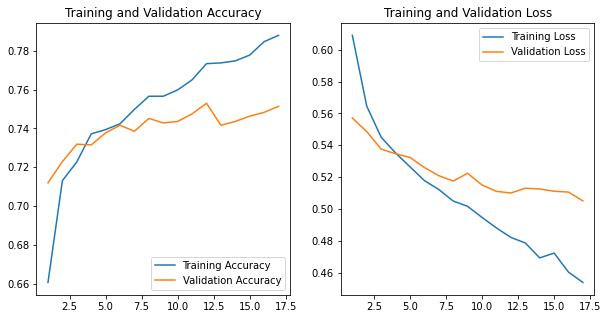

In [ ]:
# 매 epochs마다 모델 정확도와 손실을 그래프로 그립니다.
import matplotlib.pyplot as plt

acc = history.history['accuracy']         # 모델의 학습 정확도를 변수 acc에 저장  
val_acc = history.history['val_accuracy'] # 모델의 검증 정확도를 변수 val_acc에 저장
loss=history.history['loss']              # 모델의 학습 손실을 변수 loss에 저장  
val_loss=history.history['val_loss']      # 모델의 검증 손실을 변수 val_loss에 저장    


# epochs가 17회가 아닌 다른 결과(예:15회)로 나오면 아래 줄 17을 해당 숫자인 15로 바꿔주야 함에 유의
epochs_range = range(1, 17+1)             # epochs가 17회까지만 수행된 것을 반영

# 학습 정확도와 검증 정확도 그리기
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# 학습 손실와 검증 손실 그리기
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# model.fit() 실행시 검증 정확도가 가장 높은 에포크에 해당하는 모델 가중치 계수 불러오기
model.load_weights('Ch4-NN1.tf')

In [ ]:
# 결과창의 321로 10247 X_test 행수를 나누면 약 32가 나옴 
# 즉 기본 배치값 32가 적용됐음을 알 수 있음

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("test accuracy:", test_accuracy)

321/321 [==============================] - 1s 2ms/step - loss: 0.5183 - accuracy: 0.7418
test accuracy: 0.7418032884597778


In [ ]:
# 참고 계산
10247/32

320.21875

In [ ]:
y_prob = model.predict(X_test)
y_prob.round(2)

array([[0.3 ],
       [0.7 ],
       [0.7 ],
       ...,
       [1.  ],
       [0.33],
       [0.99]], dtype=float32)

In [ ]:
from sklearn.metrics import roc_auc_score

y_prob = model.predict(X_test)
ROC_AUC = roc_auc_score(y_test, y_prob)
print("ROC AUC on test set:{:.5f}".format(ROC_AUC))

ROC AUC on test set:0.82188
